In [2]:
import matplotlib.pyplot as plt
import re
import numpy as np

errD = errD_real + errD_fake

output = netD(fake)  
errG = criterion(output, real_label)

## flow-gan loss

In [3]:
f = open("./flow_gan/flow_gan.log")

loss_d = []
loss_g = []

for i in f:
    information = re.split("INFO ", i, 2)[1]
    entries = re.split(', ', information)
    for e in entries:
        k, v = re.split(': ', e)
        if k == 'Loss_D':
            loss_d.append(float(v))
        elif k == 'Loss_G':
            loss_g.append(float(v))

loss_d = np.array(loss_d)
loss_g = np.array(loss_g)

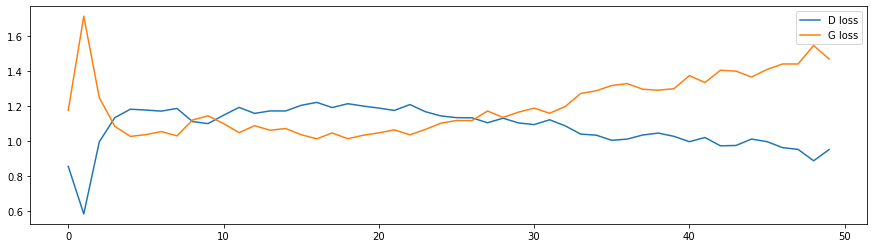

In [4]:
x = np.arange(len(loss_d))

f = plt.figure(figsize=(15,4))
l1, = plt.plot(x, loss_d, label='D loss')
l2, = plt.plot(x, loss_g, label='G loss')

plt.legend(handles=[l1, l2])

## dcgan loss

In [25]:
f = open("../dcgan/dcgan.log")

loss_d = []
loss_g = []

for i in f:
    information = re.split("INFO ", i, 2)[1]
    entries = re.split(', ', information)
    for e in entries:
        k, v = re.split(': ', e)
        if k == 'err_D':
            loss_d.append(float(v))
        elif k == 'err_G':
            loss_g.append(float(v))

loss_d = np.array(loss_d)
loss_g = np.array(loss_g)

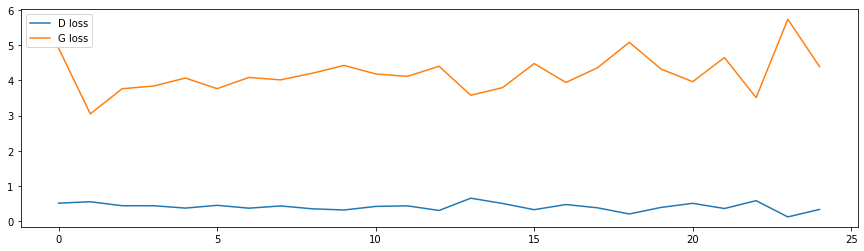

In [26]:
x = np.arange(len(loss_d))

f = plt.figure(figsize=(15,4))
l2, = plt.plot(x, loss_g, label='G loss')

plt.legend(handles=[l1, l2])

## flow-gan likelihood

In [23]:
f = open("./flow_gan/flow_gan.log")

nll = []

for i in f:
    information = re.split("INFO ", i, 2)[1]
    entries = re.split(', ', information)
    for e in entries:
        k, v = re.split(': ', e)
        if k == 'likelihood':
            nll.append(float(v))

nll = nll[50:]
nll = np.array(nll)

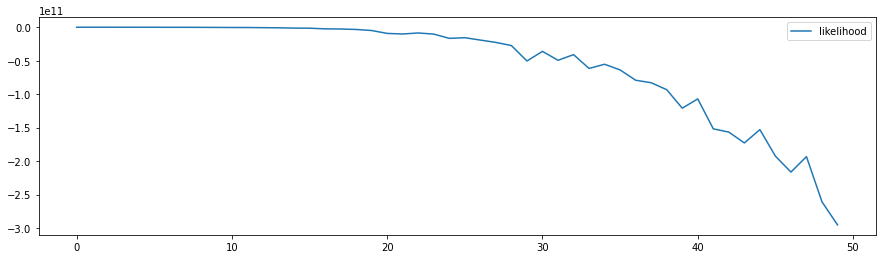

In [24]:
x = np.arange(len(nll))

f = plt.figure(figsize=(15,4))
l1, = plt.plot(x, nll, label='likelihood')

plt.legend(handles=[l1])

## realnvp loss

In [34]:
f = open("../real-nvp/realnvp_log.log")

loss = []
loss_val = []

for i in f:
    information = re.split("INFO ", i, 2)[1]
    entries = re.split(', ', information)
    flag_val = 0
    for e in entries:
        k = re.split(': ', e)[0]
        if k == 'loss':
            loss.append(float(re.split(': ', e)[1]))
            flag_val = 0
        elif k == 'val_loss':
            loss_val.append(float(re.split(': ', e)[1]))
            flag_val = 1

loss = loss[26:]
loss_val = loss_val[26:]
loss = np.array(loss)

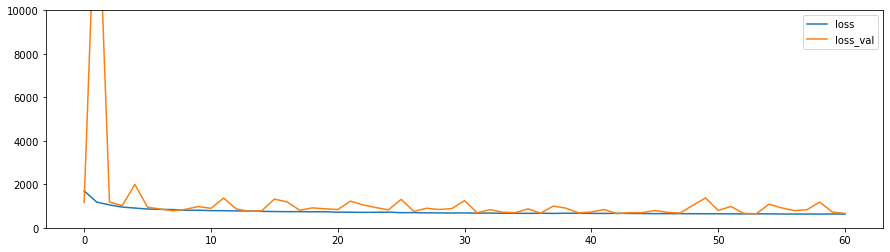

In [35]:
x = np.arange(len(loss))

f = plt.figure(figsize=(15,4))
l1, = plt.plot(x, loss, label='loss')
l2, = plt.plot(x, loss_val, label='loss_val')
plt.ylim(0, 10000)
plt.legend(handles=[l1, l2])

## realnvp ll

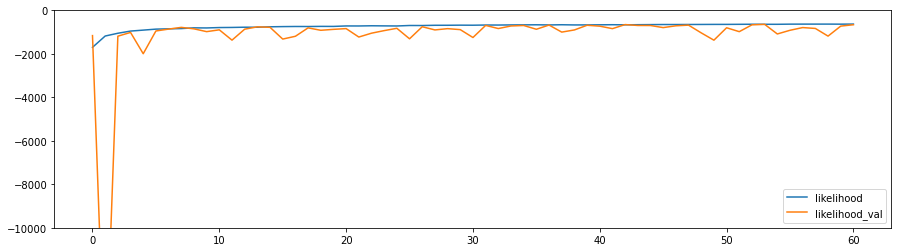

In [38]:
x = np.arange(len(loss))

f = plt.figure(figsize=(15,4))
l1, = plt.plot(x, [-i for i in loss], label='likelihood')
l2, = plt.plot(x, [-i for i in loss_val], label='likelihood_val')
plt.ylim(-10000, 0)
plt.legend(handles=[l1, l2])

## hybrid training ll

In [5]:
f = open("./flow_gan/flow_gan_hybrid.log")

nll = []

for i in f:
    information = re.split("INFO ", i, 2)[1]
    entries = re.split(', ', information)
    for e in entries:
        k, v = re.split(': ', e)
        if k == 'likelihood':
            nll.append(-float(v))

nll = np.array(nll)

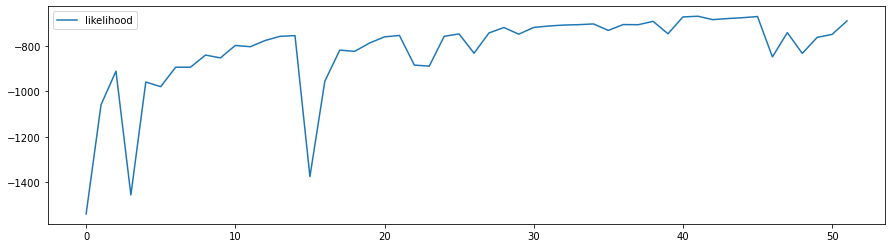

In [6]:
x = np.arange(len(nll))

f = plt.figure(figsize=(15,4))
l1, = plt.plot(x, nll, label='likelihood')

plt.legend(handles=[l1])

## hybrid training loss

In [7]:
f = open("./flow_gan/flow_gan_hybrid.log")

loss_d = []
loss_g = []

for i in f:
    information = re.split("INFO ", i, 2)[1]
    entries = re.split(', ', information)
    for e in entries:
        k, v = re.split(': ', e)
        if k == 'Loss_D':
            loss_d.append(float(v))
        elif k == 'Loss_G':
            loss_g.append(float(v))

loss_d = np.array(loss_d)
loss_g = np.array(loss_g)

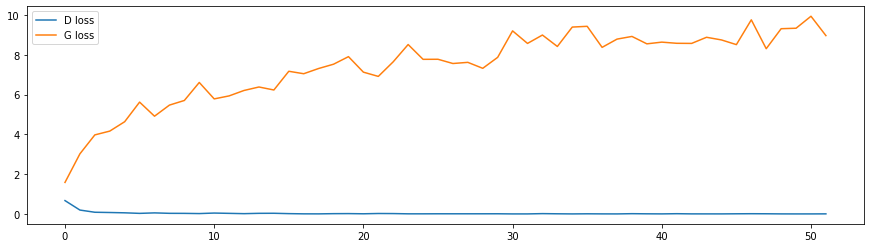

In [8]:
x = np.arange(len(loss_d))

f = plt.figure(figsize=(15,4))
l1, = plt.plot(x, loss_d, label='D loss')
l2, = plt.plot(x, loss_g, label='G loss')

plt.legend(handles=[l1, l2])